# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
import os
import zipfile
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

# Import Datasets

In [ ]:
!pip install -q kaggle

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mochamadrafiathallah","key":"b10d215d47c6481be3f2fe725eb450dc"}'}

In [ ]:
!ls

kaggle.json  sample_data


In [ ]:
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [ ]:
!chmod 600 /content/kaggle.json

In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

 99% 2.67G/2.70G [00:17<00:00, 202MB/s]
100% 2.70G/2.70G [00:17<00:00, 161MB/s]


In [ ]:
!unzip *.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [ ]:
!ls

 kaggle.json				  new-plant-diseases-dataset.zip
'new plant diseases dataset(augmented)'   sample_data
'New Plant Diseases Dataset(Augmented)'   test


# Training Model 1

In [ ]:
# Membuat Training Generator
train_generator = ImageDataGenerator(rescale=1/255,
                                     horizontal_flip=True,
                                     vertical_flip=True,
                                     rotation_range=60,
                                     zoom_range=0.3,
                                     fill_mode='nearest')

In [ ]:
# Membuat Training Data Generator
train_data = train_generator.flow_from_directory('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
                                                 target_size=(256, 256),
                                                 batch_size=50,
                                                  class_mode='categorical',)

Found 70295 images belonging to 38 classes.


In [ ]:
train_data.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [ ]:
# Membuat Data Validasi
val_generator = ImageDataGenerator(rescale=1/255)
val_data = val_generator.flow_from_directory('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
                                             target_size=(256, 256),
                                             class_mode='categorical',
                                             batch_size=50,)

Found 17572 images belonging to 38 classes.


In [ ]:
val_data.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [ ]:
# Konstruksi Model
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(3,3),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(38, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 41, 41, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 53792)             0         
                                                                 
 dense (Dense)               (None, 256)               1

In [ ]:
#Kompile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Training Model
history = model.fit(train_data,
                    epochs=15,
                    validation_data=val_data,
                    verbose=1)

Epoch 1/15
1406/1406 [==============================] - 1225s 861ms/step - loss: 1.5238 - accuracy: 0.5493 - val_loss: 0.9634 - val_accuracy: 0.7091
Epoch 2/15
1406/1406 [==============================] - 1156s 822ms/step - loss: 0.7000 - accuracy: 0.7777 - val_loss: 0.9408 - val_accuracy: 0.7174
Epoch 3/15
1406/1406 [==============================] - 1152s 819ms/step - loss: 0.5188 - accuracy: 0.8336 - val_loss: 0.6806 - val_accuracy: 0.7850
Epoch 4/15
1406/1406 [==============================] - 1150s 818ms/step - loss: 0.4422 - accuracy: 0.8560 - val_loss: 0.6081 - val_accuracy: 0.8095
Epoch 5/15
1406/1406 [==============================] - 1145s 814ms/step - loss: 0.3956 - accuracy: 0.8710 - val_loss: 0.4197 - val_accuracy: 0.8654
Epoch 6/15
1406/1406 [==============================] - 1174s 835ms/step - loss: 0.3541 - accuracy: 0.8823 - val_loss: 0.5651 - val_accuracy: 0.8403
Epoch 7/15
1406/1406 [==============================] - 1145s 814ms/step - loss: 0.3336 - accuracy: 0.8903

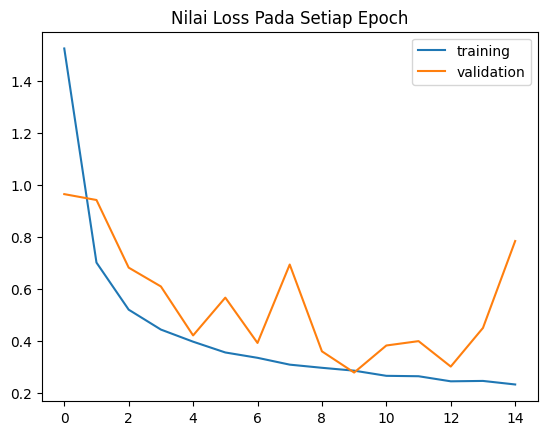

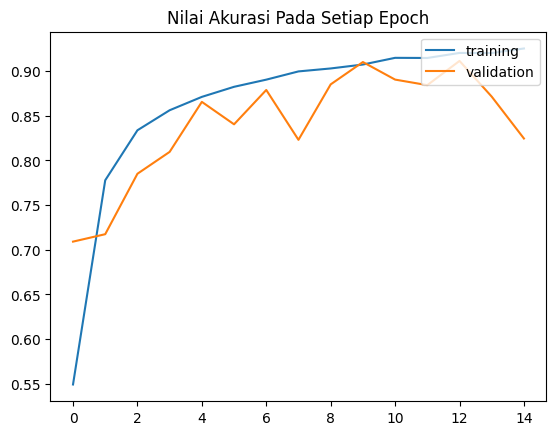

In [ ]:
#Plot Perubahan Nilai Loss dan Akurasi Pada Setiap Epoch Saat Training
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Nilai Loss Pada Setiap Epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Nilai Akurasi Pada Setiap Epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [ ]:
model.save('model_baru1.keras')
model.save('model_baru1.h5')

#Training Model 2

In [ ]:
# Membuat Training Generator
train_generator = ImageDataGenerator(rescale=1/255,
                                     horizontal_flip=True,
                                     vertical_flip=True,
                                     rotation_range=60,
                                     zoom_range=0.3,
                                     fill_mode='nearest')

In [ ]:
# Membuat Training Data Generator
train_data = train_generator.flow_from_directory('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
                                                 target_size=(256, 256),
                                                 batch_size=100,
                                                  class_mode='categorical',)

Found 70295 images belonging to 38 classes.


In [ ]:
# Membuat Data Validasi
val_generator = ImageDataGenerator(rescale=1/255)
val_data = val_generator.flow_from_directory('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
                                             target_size=(256, 256),
                                             class_mode='categorical',
                                             batch_size=100,)

Found 17572 images belonging to 38 classes.


In [ ]:
# Konstruksi Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(3,3),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(38, activation='softmax')
])

In [ ]:
# Testing Model
def model_prediction(model):
  uploaded = files.upload()

  for fn in uploaded.keys():
    path = fn
    img = load_img(path, target_size=(256, 256))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=100)
    print(fn)
    print(classes.argmax(axis=-1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 41, 41, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 107584)            0         
                                                                 
 dense (Dense)               (None, 256)               2

In [ ]:
#Kompile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Training Model
history = model.fit(train_data,
                    epochs=15,
                    validation_data=val_data,
                    verbose=1)

Epoch 1/15
703/703 [==============================] - 1251s 2s/step - loss: 1.4412 - accuracy: 0.5730 - val_loss: 0.9508 - val_accuracy: 0.7039
Epoch 2/15
703/703 [==============================] - 1198s 2s/step - loss: 0.5902 - accuracy: 0.8106 - val_loss: 0.7287 - val_accuracy: 0.7719
Epoch 3/15
703/703 [==============================] - 1200s 2s/step - loss: 0.4284 - accuracy: 0.8609 - val_loss: 0.5101 - val_accuracy: 0.8433
Epoch 4/15
703/703 [==============================] - 1186s 2s/step - loss: 0.3438 - accuracy: 0.8864 - val_loss: 0.6531 - val_accuracy: 0.8250
Epoch 5/15
703/703 [==============================] - 1214s 2s/step - loss: 0.2922 - accuracy: 0.9034 - val_loss: 0.4058 - val_accuracy: 0.8735
Epoch 6/15
703/703 [==============================] - 1192s 2s/step - loss: 0.2661 - accuracy: 0.9119 - val_loss: 0.4202 - val_accuracy: 0.8742
Epoch 7/15
703/703 [==============================] - 1175s 2s/step - loss: 0.2391 - accuracy: 0.9222 - val_loss: 0.3966 - val_accuracy:

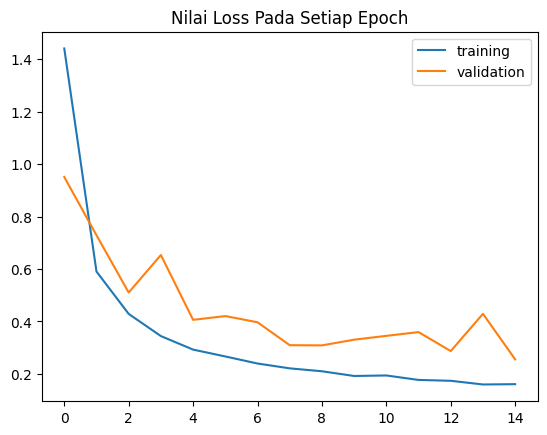

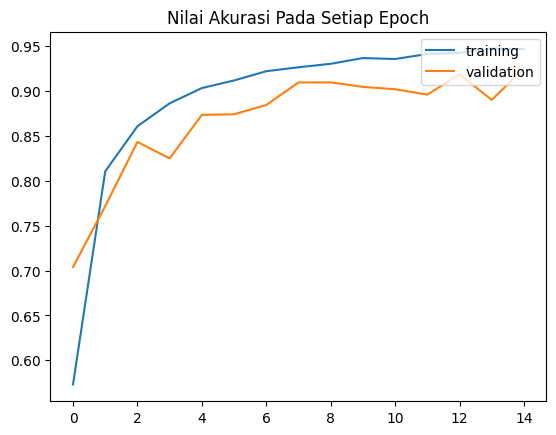

In [ ]:
#Plot Perubahan Nilai Loss dan Akurasi Pada Setiap Epoch Saat Training
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Nilai Loss Pada Setiap Epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Nilai Akurasi Pada Setiap Epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [ ]:
model.save('model_baru2.keras')
model.save('model_baru2.h5')

#Training Model 3

In [ ]:
# Membuat Training Generator
train_generator = ImageDataGenerator(rescale=1/255)

In [ ]:
# Membuat Training Data Generator
train_data = train_generator.flow_from_directory('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
                                                 target_size=(256, 256),
                                                 batch_size=100,
                                                  class_mode='categorical',)

Found 70295 images belonging to 38 classes.


In [ ]:
# Membuat Data Validasi
val_generator = ImageDataGenerator(rescale=1/255)
val_data = val_generator.flow_from_directory('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
                                             target_size=(256, 256),
                                             class_mode='categorical',
                                             batch_size=100,)

Found 17572 images belonging to 38 classes.


In [ ]:
# Konstruksi Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(3,3),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(38, activation='softmax')
])

In [ ]:
# Testing Model
def model_prediction(model):
  uploaded = files.upload()

  for fn in uploaded.keys():
    path = fn
    img = load_img(path, target_size=(256, 256))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=100)
    print(fn)
    print(classes.argmax(axis=-1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 41, 41, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 107584)            0         
                                                                 
 dense (Dense)               (None, 256)               2

In [ ]:
#Kompile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Training Model
history = model.fit(train_data,
                    epochs=15,
                    validation_data=val_data,
                    verbose=1)

Epoch 1/15
703/703 [==============================] - 358s 490ms/step - loss: 1.1617 - accuracy: 0.6652 - val_loss: 0.4150 - val_accuracy: 0.8673
Epoch 2/15
703/703 [==============================] - 305s 434ms/step - loss: 0.3392 - accuracy: 0.8919 - val_loss: 0.2852 - val_accuracy: 0.9059
Epoch 3/15
703/703 [==============================] - 300s 427ms/step - loss: 0.1671 - accuracy: 0.9456 - val_loss: 0.2216 - val_accuracy: 0.9289
Epoch 4/15
703/703 [==============================] - 301s 427ms/step - loss: 0.1130 - accuracy: 0.9622 - val_loss: 0.2145 - val_accuracy: 0.9351
Epoch 5/15
703/703 [==============================] - 306s 435ms/step - loss: 0.0816 - accuracy: 0.9731 - val_loss: 0.2788 - val_accuracy: 0.9211
Epoch 6/15
703/703 [==============================] - 303s 431ms/step - loss: 0.0715 - accuracy: 0.9766 - val_loss: 0.2793 - val_accuracy: 0.9243
Epoch 7/15
703/703 [==============================] - 302s 429ms/step - loss: 0.0515 - accuracy: 0.9830 - val_loss: 0.3050 -

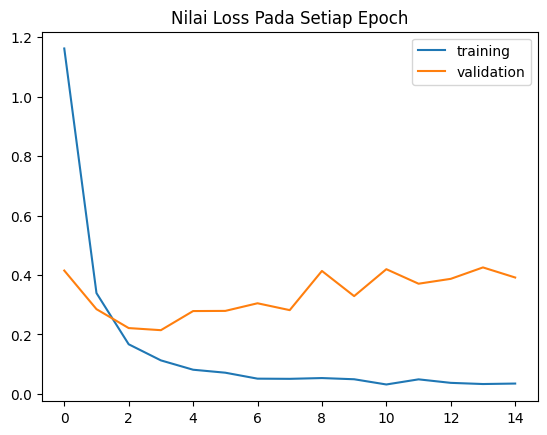

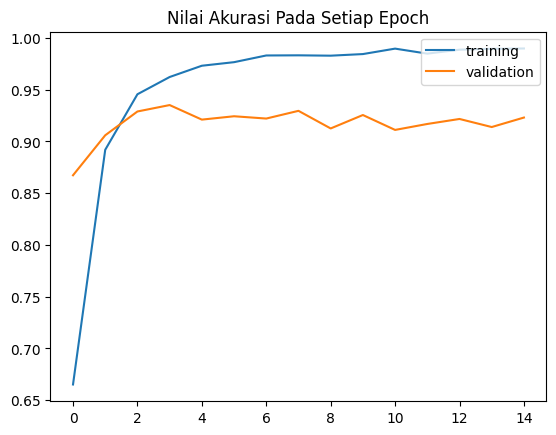

In [ ]:
#Plot Perubahan Nilai Loss dan Akurasi Pada Setiap Epoch Saat Training
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Nilai Loss Pada Setiap Epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Nilai Akurasi Pada Setiap Epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [ ]:
model.save('model_baru3.keras')
model.save('model_baru3.h5')

#Training Model 5

In [ ]:
# Membuat Training Generator
train_generator = ImageDataGenerator(rescale=1/255)

In [ ]:
# Membuat Training Data Generator
train_data = train_generator.flow_from_directory('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
                                                 target_size=(256, 256),
                                                 batch_size=25,
                                                  class_mode='categorical',)

Found 70295 images belonging to 38 classes.


In [ ]:
# Membuat Data Validasi
val_generator = ImageDataGenerator(rescale=1/255)
val_data = val_generator.flow_from_directory('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
                                             target_size=(256, 256),
                                             class_mode='categorical',
                                             batch_size=25,)

Found 17572 images belonging to 38 classes.


In [ ]:
# Konstruksi Model
model = Sequential([
    Conv2D(63, (3,3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(3,3),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(38, activation='softmax')
])

In [ ]:
# Testing Model
def model_prediction(model):
  uploaded = files.upload()

  for fn in uploaded.keys():
    path = fn
    img = load_img(path, target_size=(256, 256))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=100)
    print(fn)
    print(classes.argmax(axis=-1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 63)      1764      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 63)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 128)     72704     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 41, 41, 128)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 215168)            0         
                                                                 
 dense (Dense)               (None, 256)               5

In [ ]:
#Kompile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Training Model
history = model.fit(train_data,
                    epochs=30,
                    validation_data=val_data,
                    verbose=1)

Epoch 1/30
2812/2812 [==============================] - 349s 120ms/step - loss: 0.8931 - accuracy: 0.7324 - val_loss: 0.3909 - val_accuracy: 0.8746
Epoch 2/30
2812/2812 [==============================] - 319s 113ms/step - loss: 0.2631 - accuracy: 0.9157 - val_loss: 0.3255 - val_accuracy: 0.8977
Epoch 3/30
2812/2812 [==============================] - 318s 113ms/step - loss: 0.1562 - accuracy: 0.9502 - val_loss: 0.3588 - val_accuracy: 0.9035
Epoch 4/30
2812/2812 [==============================] - 314s 112ms/step - loss: 0.1133 - accuracy: 0.9649 - val_loss: 0.4367 - val_accuracy: 0.8969
Epoch 5/30
2812/2812 [==============================] - 313s 111ms/step - loss: 0.0945 - accuracy: 0.9727 - val_loss: 0.5162 - val_accuracy: 0.8821
Epoch 6/30
2812/2812 [==============================] - 315s 112ms/step - loss: 0.0822 - accuracy: 0.9763 - val_loss: 0.4901 - val_accuracy: 0.8916
Epoch 7/30
2812/2812 [==============================] - 319s 113ms/step - loss: 0.0735 - accuracy: 0.9793 - val_

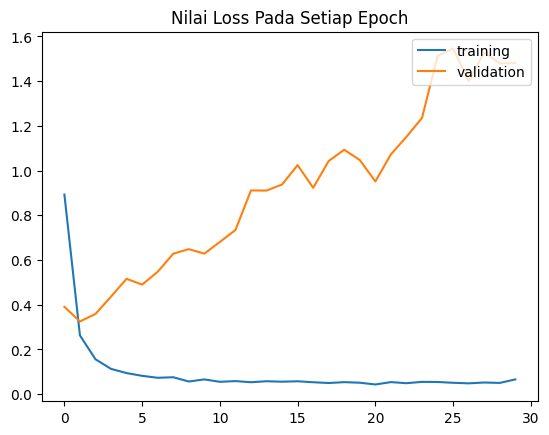

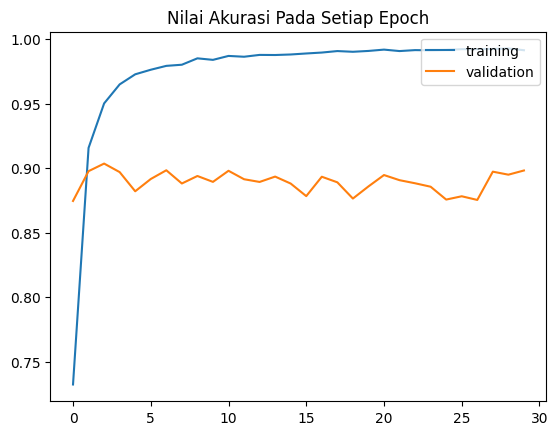

In [ ]:
#Plot Perubahan Nilai Loss dan Akurasi Pada Setiap Epoch Saat Training
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Nilai Loss Pada Setiap Epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Nilai Akurasi Pada Setiap Epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [ ]:
model.save('model_baru5.keras')
model.save('model_baru5.h5')

#Training Model 6

In [ ]:
# Membuat Training Generator
train_generator = ImageDataGenerator(rescale=1/255)

In [ ]:
# Membuat Training Data Generator
train_data = train_generator.flow_from_directory('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
                                                 target_size=(256, 256),
                                                 batch_size=75,
                                                  class_mode='categorical',)

Found 70295 images belonging to 38 classes.


In [ ]:
# Membuat Data Validasi
val_generator = ImageDataGenerator(rescale=1/255)
val_data = val_generator.flow_from_directory('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
                                             target_size=(256, 256),
                                             class_mode='categorical',
                                             batch_size=75,)

Found 17572 images belonging to 38 classes.


In [ ]:
# Konstruksi Model
model = Sequential([
    Conv2D(128, (3,3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2,2),
    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(3,3),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(38, activation='softmax')
])

In [ ]:
# Testing Model
def model_prediction(model):
  uploaded = files.upload()

  for fn in uploaded.keys():
    path = fn
    img = load_img(path, target_size=(256, 256))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=100)
    print(fn)
    print(classes.argmax(axis=-1))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 254, 254, 128)     3584      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 127, 127, 128)    0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 256)     295168    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 41, 41, 256)      0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 430336)            0         
                                                                 
 dense_3 (Dense)             (None, 256)              

In [ ]:
#Kompile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Training Model
history = model.fit(train_data,
                    epochs=30,
                    validation_data=val_data,
                    verbose=1)

Epoch 1/30
938/938 [==============================] - 682s 714ms/step - loss: 1.1627 - accuracy: 0.6650 - val_loss: 0.4766 - val_accuracy: 0.8462
Epoch 2/30
938/938 [==============================] - 663s 707ms/step - loss: 0.3313 - accuracy: 0.8928 - val_loss: 0.3066 - val_accuracy: 0.9014
Epoch 3/30
938/938 [==============================] - 660s 704ms/step - loss: 0.1738 - accuracy: 0.9424 - val_loss: 0.3089 - val_accuracy: 0.9033
Epoch 4/30
938/938 [==============================] - 675s 720ms/step - loss: 0.1210 - accuracy: 0.9602 - val_loss: 0.3682 - val_accuracy: 0.8962
Epoch 5/30
938/938 [==============================] - 653s 696ms/step - loss: 0.0997 - accuracy: 0.9673 - val_loss: 0.3362 - val_accuracy: 0.9103
Epoch 6/30
938/938 [==============================] - 655s 697ms/step - loss: 0.0722 - accuracy: 0.9769 - val_loss: 0.3487 - val_accuracy: 0.9161
Epoch 7/30
938/938 [==============================] - 654s 697ms/step - loss: 0.0721 - accuracy: 0.9765 - val_loss: 0.4083 -

In [ ]:
#Plot Perubahan Nilai Loss dan Akurasi Pada Setiap Epoch Saat Training
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Nilai Loss Pada Setiap Epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Nilai Akurasi Pada Setiap Epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [ ]:
model.save('model_baru6.keras')
model.save('model_baru6.h5')